<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/Sarah_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [7]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [8]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# workclass - mode
df['workclass'].fillna(value=str(df['workclass'].mode()[0]), inplace=True)

# occupation - mode
df['occupation'].fillna(value=str(df['occupation'].mode()[0]), inplace=True)

# native-country - mode
df['native-country'].fillna(value=str(df['native-country'].mode()[0]), inplace=True)

/tmp/ipython-input-606868706.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value=str(df['workclass'].mode()[0]), inplace=True)
/tmp/ipython-input-606868706.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [10]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

categorical_cols = df.select_dtypes(include=['object']).columns
print("Fitur kategorikal:\n", categorical_cols)

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()


    # Ganti nilai aneh atau missing value dengan 'Others'
    df[col] = df[col].replace(
        ['\\?', 'NA', 'NaN', 'nan', 'functools.cached_property at'],
        'Others',
        regex=True
    )

# Normalisasi kategori spesifik
df['native-country'] = df['native-country'].replace({
    'United-States': 'United States',
    'Trinadad&Tobago': 'Trinidad & Tobago',
    'South': 'Others'
})

df['workclass'] = df['workclass'].replace({
    'Self-emp-not-inc': 'Self-emp',
    'Self-emp-inc': 'Self-emp'
})

df['marital-status'] = df['marital-status'].replace({
    'Never-married': 'Never Married'
})

df['income'] = df['income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})

# Cek ulang hasil pembersihan
for col in categorical_cols:
    print(f"\n--- {col} setelah dibersihkan ---")
    print(df[col].value_counts(dropna=False).head(20))

Fitur kategorikal:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

--- workclass setelah dibersihkan ---
workclass
Private         34869
Self-emp         5557
Local-gov        3136
State-gov        1981
Others           1836
Federal-gov      1432
Without-pay        21
Never-worked       10
Name: count, dtype: int64

--- education setelah dibersihkan ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

--- marital-status setelah dibersihkan ---
marital-status
Married-civ-spouse       22379
Never Married            16117
Divorced                  6

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

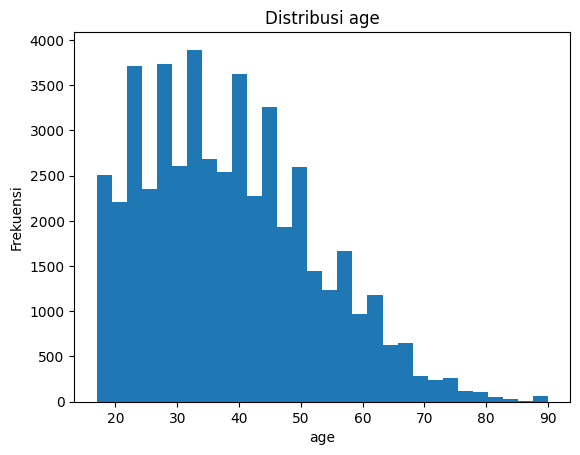

In [11]:
# Jawab 1.1 - Histrogram

num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

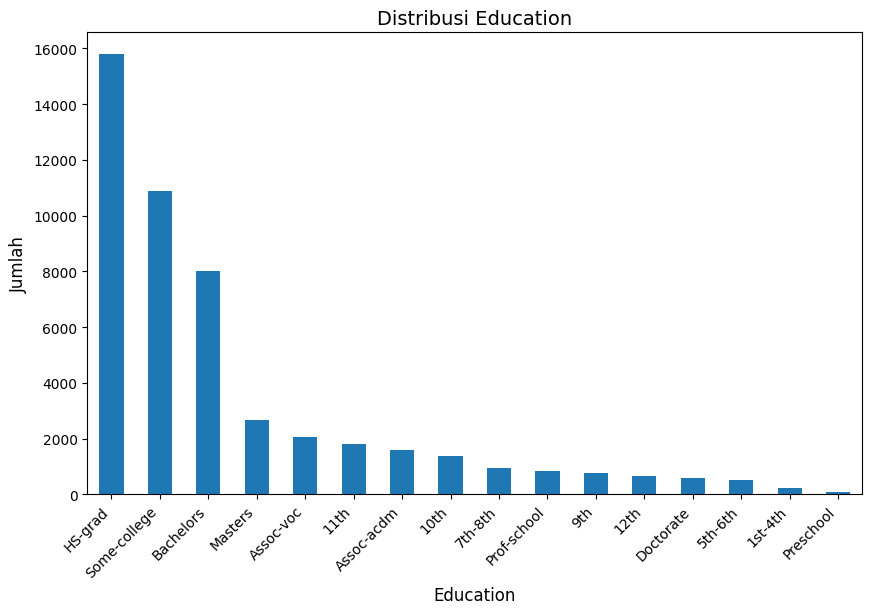

In [12]:
# Jawab 1.2 - Barchart

# Hitung distribusi education
education_counts = df['education'].value_counts(dropna=False)

# Plot barchart
plt.figure(figsize=(10,6))
education_counts.plot(kind='bar')

plt.title("Distribusi Education", fontsize=14)
plt.xlabel("Education", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Unique values in income before plotting: ['<=50K' '>50K']


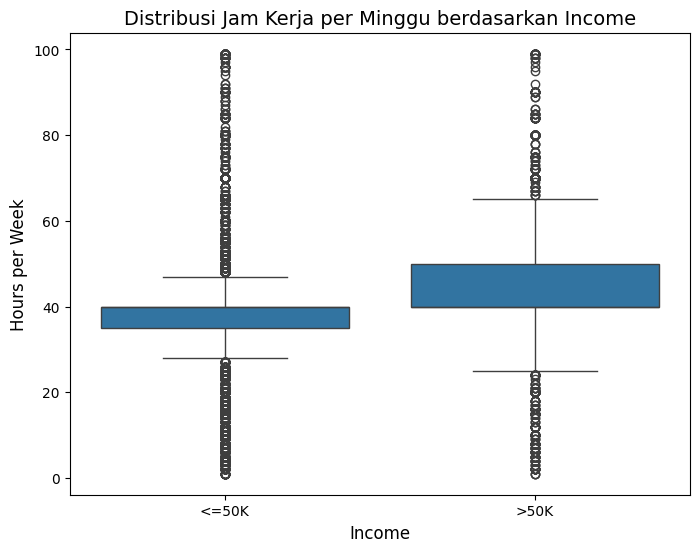

In [13]:
# Jawab 1.3 - Boxplot

print("Unique values in income before plotting:", df['income'].unique())

plt.figure(figsize=(8,6))
sns.boxplot(x="income", y="hours-per-week", data=df)

plt.title("Distribusi Jam Kerja per Minggu berdasarkan Income", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Hours per Week", fontsize=12)
plt.show()

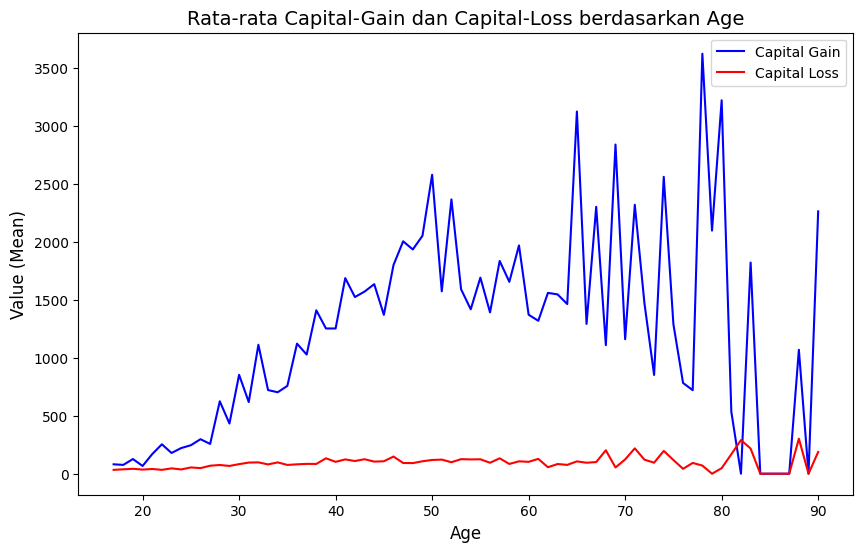

In [14]:
# Jawab 1.4 - Lineplot

age_group = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_group['age'], age_group['capital-gain'], label='Capital Gain', color='blue')
plt.plot(age_group['age'], age_group['capital-loss'], label='Capital Loss', color='red')

plt.title("Rata-rata Capital-Gain dan Capital-Loss berdasarkan Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Value (Mean)", fontsize=12)
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [15]:
# Jawab dengan komentar python

'''
1. Pada hasil distribusi age terjadi right-skewed, dimana sebagian besar data terkumpul pada rentang 20-50 tahun, dan jumlahnya menurun setelah itu. Terdapat sedikit data di atas umur 70-80 tahun, bahkan hingga 90 tahun namun jumlahnya sangat kecil.
2. Strategi yang dapat dilakukan pada data variabel age yang hilang diantaranya yaitu, median imputation karena distribusinya skewed.
3. Jumlah outlier tertinggi ada pada kategori <=50K.
'''

# itung outlier
outliers = {}

for inc in df['income'].unique():
    q1 = df[df['income']==inc]['hours-per-week'].quantile(0.25)
    q3 = df[df['income']==inc]['hours-per-week'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    outlier_count = df[(df['income']==inc) &
                       ((df['hours-per-week'] < lower) | (df['hours-per-week'] > upper))].shape[0]
    outliers[inc] = {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outlier Count": outlier_count
    }

import pandas as pd
outliers_df = pd.DataFrame(outliers).T
outliers_df


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
<=50K,35.0,40.0,5.0,27.5,47.5,11706.0
>50K,40.0,50.0,10.0,25.0,65.0,781.0


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [16]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


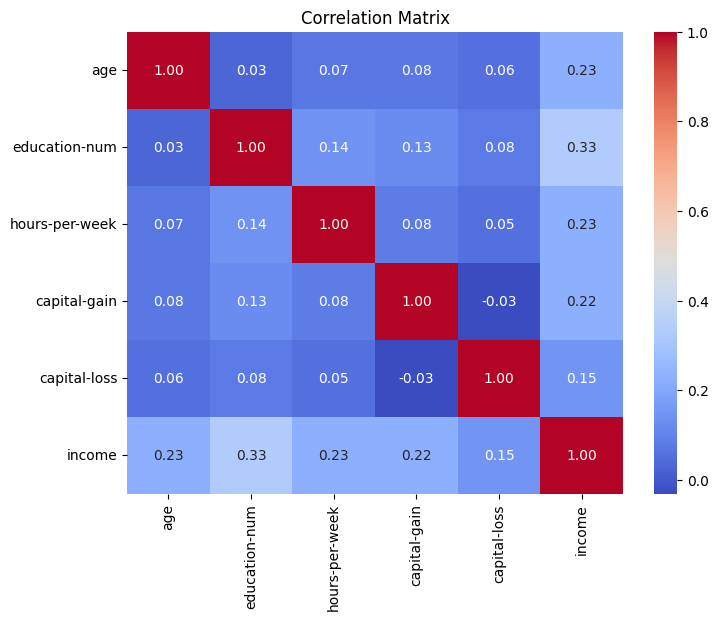

In [17]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
df_corr = df[cols]

corr_matrix = df_corr.corr()

print("Matriks Korelasi:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
Education-num memiliki korelasi paling tinggi dan menjadi prediktor paling kuat terhadap income dalam variabel ini.
Age, hours-per-week, dan capital-gain juga punya pengaruh, meski lebih lemah.
Capital-loss hampir tidak berpengaruh.
Tidak ada multikolinearitas serius antar variabel (korelasi antar variabel non-income relatif kecil)''''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [18]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


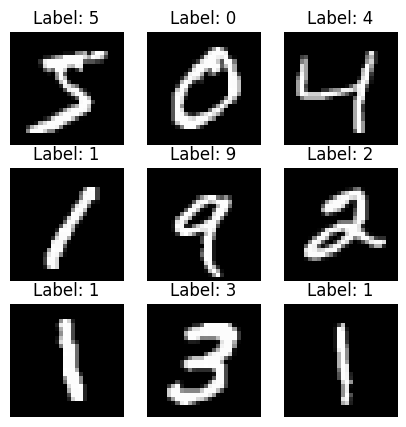

In [19]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape setelah upsampling: (10000, 32, 32)


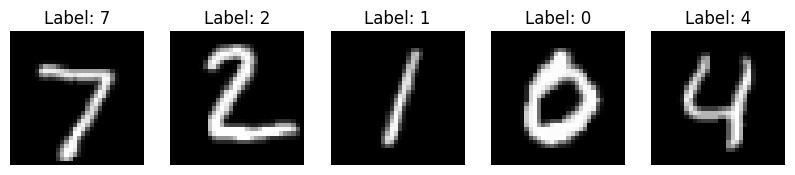

In [20]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from tensorflow.keras.datasets import mnist
from tensorflow.image import resize

X_test = X_test.astype("float32") / 255.0

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
    img = np.expand_dims(X_test[i], axis=-1)
    img_resized = resize(img, (32, 32)).numpy()
    X_test_upsampled[i] = img_resized[:, :, 0]

print("Shape setelah upsampling:", X_test_upsampled.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [21]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_normalized = X_test_upsampled / 255.0

print("Nilai minimum:", X_test_normalized.min())
print("Nilai maksimum:", X_test_normalized.max())
print("Shape:", X_test_normalized.shape)

Nilai minimum: 0.0
Nilai maksimum: 0.00392156862745098
Shape: (10000, 32, 32)


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [22]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flatten = np.zeros((X_test_normalized.shape[0], 32*32))

for i in range(X_test_normalized.shape[0]):
    X_test_flatten[i] = X_test_normalized[i].flatten()

print("Shape setelah flatten:", X_test_flatten.shape)
print("Contoh data pertama:", X_test_flatten[0][:20])

Shape setelah flatten: (10000, 1024)
Contoh data pertama: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
